<a href="https://colab.research.google.com/github/GrainSack/Assignments/blob/main/Assignment_1_regression_(5_18).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1

In [8]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
diabetes=load_diabetes()

In [9]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [10]:
df_x=np.array(diabetes.data)
df_y=np.array(diabetes.target)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [45]:
#Initialized random variable
W = np.random.rand(10)
b = np.random.rand()
#Linear regression model
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
#Loss
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
#Gradient
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

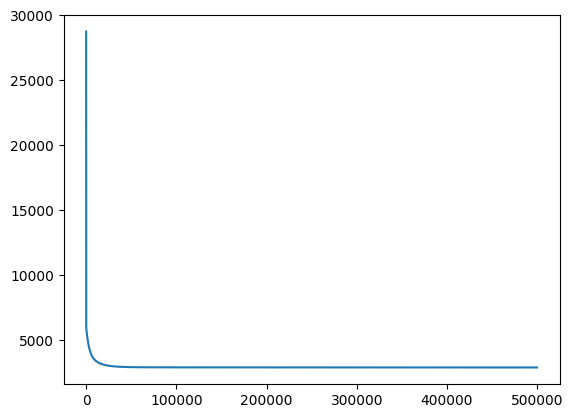

In [46]:
LEARNING_RATE = 0.01
losses = []

for i in range(1, 500000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    # if i % 10 == 0:
    #     print('Iteration %d : Loss %0.4f' % (i, L))
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

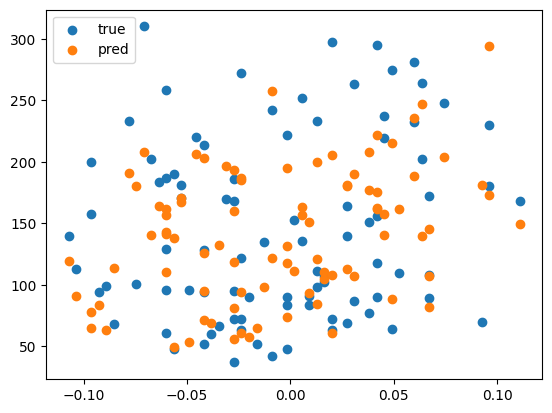

mse:2885.8621110670015


In [47]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()
print("mse:{}".format(mse))

# Project 2

In [48]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [49]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AIFFEL/bike/train.csv')

In [51]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [58]:
df["datetime"] = pd.to_datetime(df["datetime"])  # Convert "datetime" column to datetime type
df['year'] = df["datetime"].dt.year  # Use .dt accessor to extract the year
print(df)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  
0      14.395        81     0.0000       

In [60]:
df['month'] = df["datetime"].dt.month

In [61]:
df['day'] = df["datetime"].dt.day
df['hour'] = df["datetime"].dt.hour
df['minute'] = df["datetime"].dt.minute
df['second'] = df["datetime"].dt.second

In [62]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<Axes: xlabel='year', ylabel='count'>

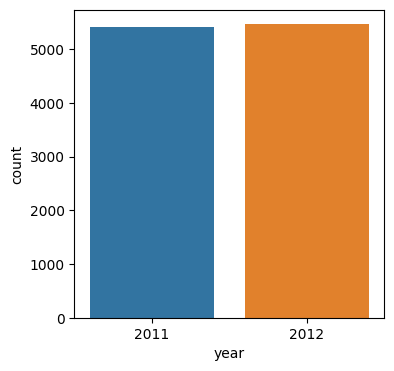

In [78]:
import seaborn as sns
plt.figure(figsize = (4,4))
sns.countplot(x = 'year', data=df)

<Axes: xlabel='month', ylabel='count'>

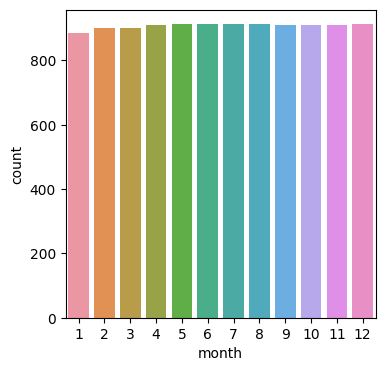

In [80]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'month', data=df)

<Axes: xlabel='day', ylabel='count'>

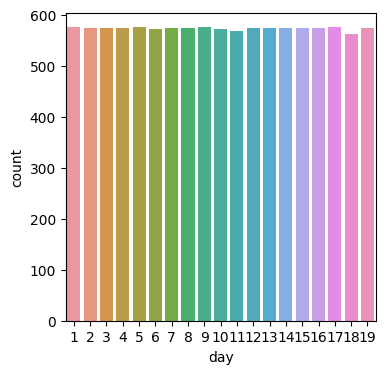

In [81]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'day', data=df)

<Axes: xlabel='hour', ylabel='count'>

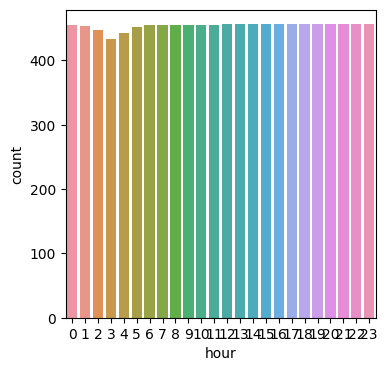

In [82]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'hour', data=df)

<Axes: xlabel='minute', ylabel='count'>

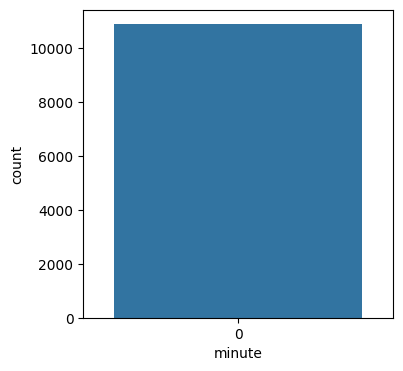

In [83]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'minute', data=df)

<Axes: xlabel='second', ylabel='count'>

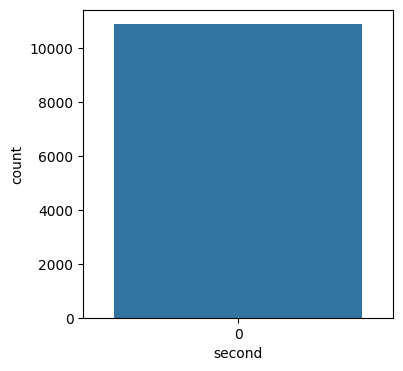

In [84]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'second', data=df)

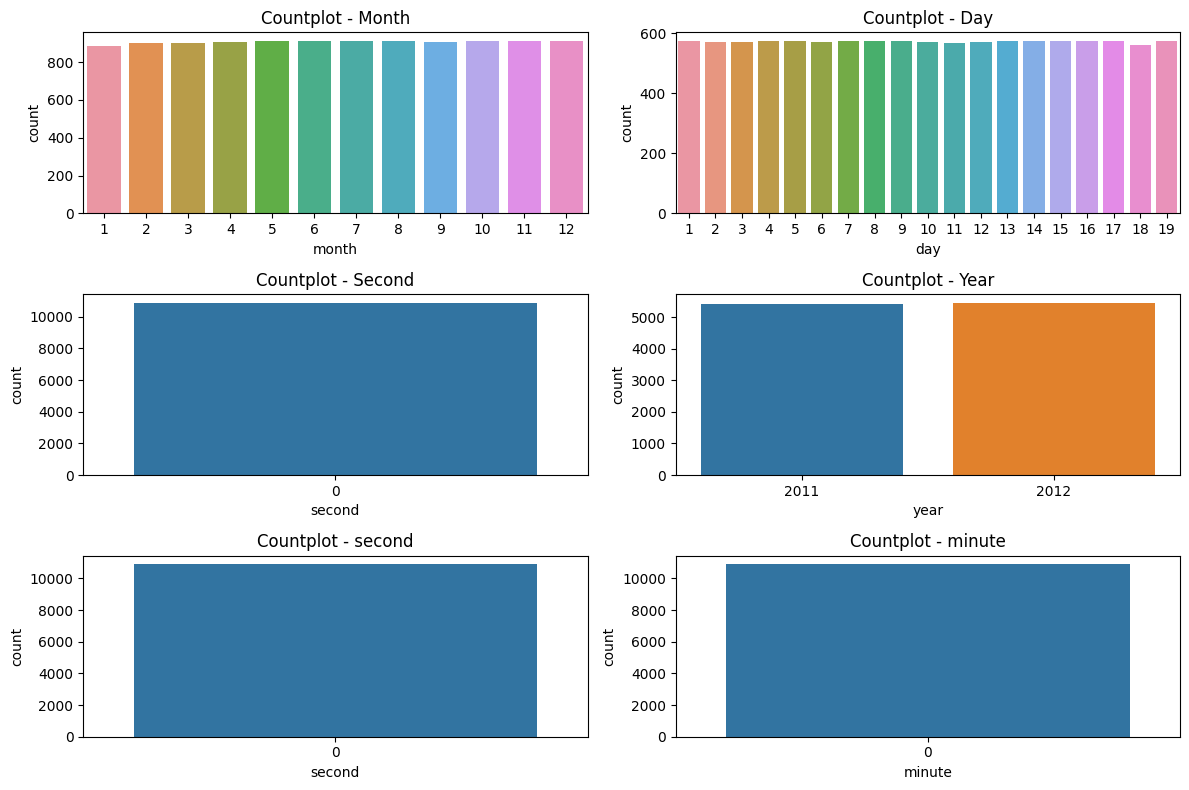

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

sns.countplot(x='month', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Countplot - Month')


sns.countplot(x='day', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Countplot - Day')


sns.countplot(x='second', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Countplot - Second')


sns.countplot(x='year', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Countplot - Year')

sns.countplot(x='second', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Countplot - second')

sns.countplot(x='minute', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Countplot - minute')

plt.tight_layout()

# Show the figure
plt.show()

In [114]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [120]:
df_test = df

In [121]:
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [93]:
y = df['count']

In [122]:
df_test = df_test.drop('datetime', axis = 'columns')

In [123]:
df_test = df_test.drop('holiday',axis = 'columns')

In [124]:
df_test = df_test.drop('workingday',axis = 'columns')

In [125]:
df_test = df_test.drop('casual',axis = 'columns')

In [126]:
df_test = df_test.drop('registered',axis = 'columns')

In [127]:
df_test = df_test.drop('minute',axis = 'columns')

In [128]:
df_test = df_test.drop('second',axis = 'columns')

In [133]:
df_test = df_test.drop('count',axis = 'columns')

In [134]:
df_test

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,1,13.94,17.425,61,6.0032,2012,12,19,22


In [132]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [135]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_test, y, test_size=0.3, random_state=777)

In [136]:
df_x_train

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour
3185,3,1,36.90,38.635,25,19.0012,2011,8,2,15
4103,4,1,13.94,17.425,87,7.0015,2011,10,3,0
2827,3,1,31.98,37.120,59,15.0013,2011,7,6,17
2224,2,3,22.14,25.760,73,12.9980,2011,5,19,14
8264,3,1,37.72,42.425,35,11.0014,2012,7,5,17
...,...,...,...,...,...,...,...,...,...,...
5789,1,1,4.10,6.060,58,11.0014,2012,1,16,9
10311,4,2,10.66,13.635,65,7.0015,2012,11,15,1
4017,3,1,20.50,24.240,72,11.0014,2011,9,18,10
7767,2,1,23.78,27.275,53,0.0000,2012,6,4,0


In [137]:
model = LinearRegression()
model.fit(df_x_train, df_y_train)

LinearRegression()

In [138]:
model.coef_

array([-7.49609566, -4.52681899,  1.56586381,  4.66984372, -2.01191367,
        0.62598547, 81.94334076,  9.83840619,  0.33903414,  7.90559027])

In [139]:
y_test_prediction = model.predict(df_x_test)
y_test_prediction

array([114.09973431, 167.19363303, 246.41199944, ..., 184.56283345,
       196.79891151, 302.26176784])

In [141]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(df_y_test, y_test_prediction) 
rmse = mae**0.5
print(mae, rmse)

20500.152892650985 143.17874455606525


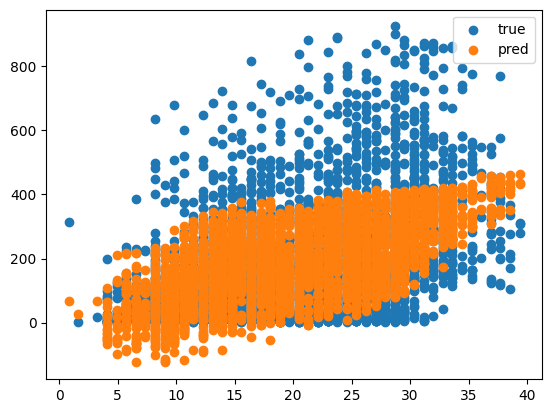

In [142]:
plt.scatter(df_x_test['temp'], df_y_test, label="true")
plt.scatter(df_x_test['temp'], y_test_prediction, label="pred")
plt.legend()
plt.show()

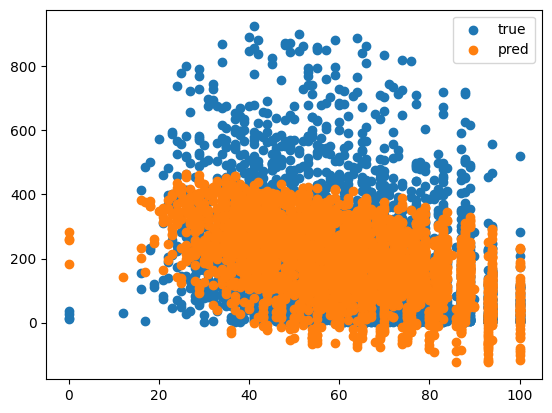

In [145]:
plt.scatter(df_x_test['humidity'], df_y_test, label="true")
plt.scatter(df_x_test['humidity'], y_test_prediction, label="pred")
plt.legend()
plt.show()